In [ ]:
# Checking GPU
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

--2025-08-01 15:19:31--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.125.207, 209.85.200.207, 173.194.206.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.125.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   130MB/s    in 1.2s    

2025-08-01 15:19:32 (130 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [ ]:
with zipfile.ZipFile('/content/10_food_classes_10_percent.zip') as zip_ref:
  zip_ref.extractall()

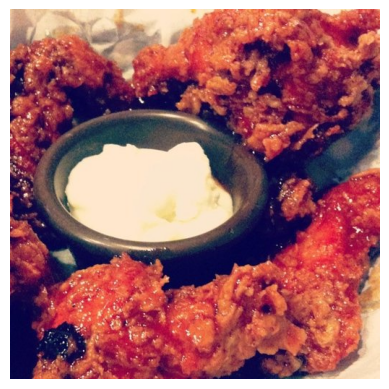

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('/content/10_food_classes_10_percent/train/chicken_wings/1022742.jpg')
imgplot = plt.imshow(img)
plt.axis(False);

In [ ]:
import os
for (dirpath, dirnames, filenames) in os.walk('/content/10_food_classes_10_percent'):
  print(f'There are {len(dirpath)} directories and {len(filenames)} images in {dirpath}')

There are 35 directories and 0 images in /content/10_food_classes_10_percent
There are 41 directories and 0 images in /content/10_food_classes_10_percent/train
There are 55 directories and 75 images in /content/10_food_classes_10_percent/train/chicken_wings
There are 47 directories and 75 images in /content/10_food_classes_10_percent/train/ramen
There are 47 directories and 75 images in /content/10_food_classes_10_percent/train/sushi
There are 55 directories and 75 images in /content/10_food_classes_10_percent/train/chicken_curry
There are 51 directories and 75 images in /content/10_food_classes_10_percent/train/hamburger
There are 52 directories and 75 images in /content/10_food_classes_10_percent/train/fried_rice
There are 51 directories and 75 images in /content/10_food_classes_10_percent/train/ice_cream
There are 47 directories and 75 images in /content/10_food_classes_10_percent/train/pizza
There are 56 directories and 75 images in /content/10_food_classes_10_percent/train/grilled

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = "/content/10_food_classes_10_percent/train/"
test_dir = "/content/10_food_classes_10_percent/test/"


train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_data_10_percent = train_datagen.flow_from_directory(directory = train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode='categorical')
test_data_10_percent = test_datagen.flow_from_directory(directory = test_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode='categorical')

Found 750 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


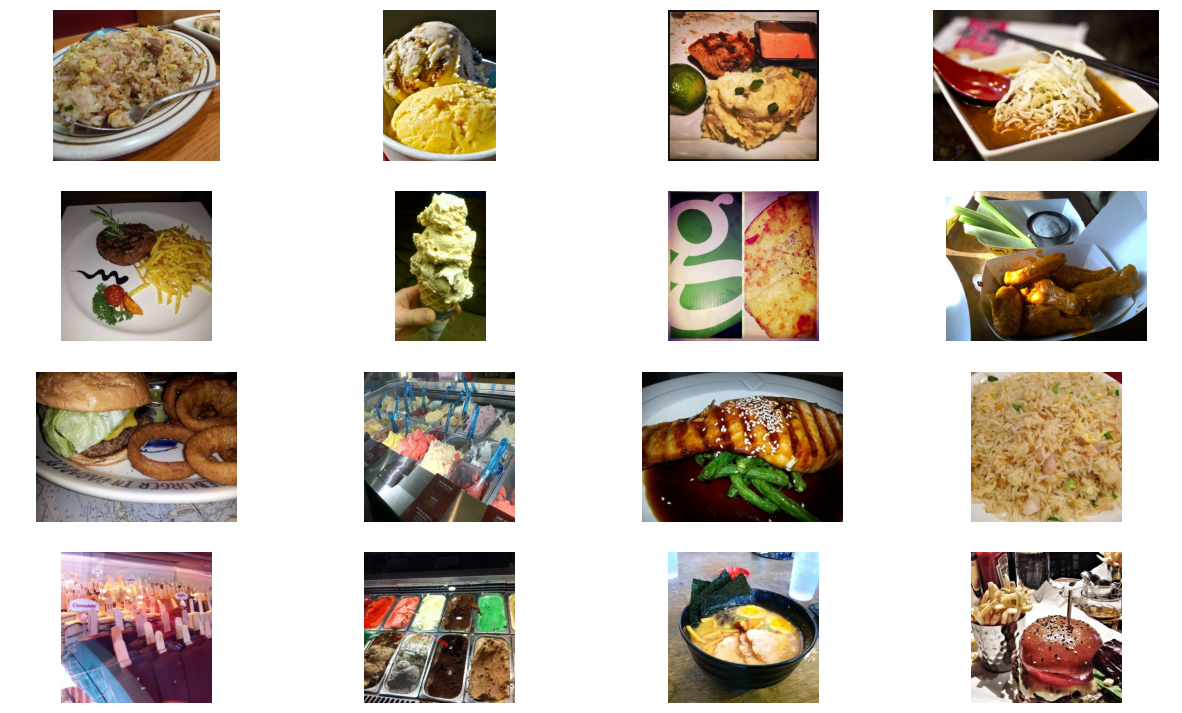

In [ ]:
import random
from PIL import Image

images = []
for folder in os.listdir(train_dir):
  for image in os.listdir(train_dir + '/' + folder):
    images.append(os.path.join(train_dir, folder, image))

plt.figure(1, figsize=(15, 9))
plt.axis('off')
n = 0
for i in range(16):
  n += 1
  random_img = random.choice(images)
  imgs = mpimg.imread(random_img)
  plt.subplot(4, 4, n)
  plt.axis('off')
  plt.imshow(imgs)

plt.show()


In [ ]:
resnet_url = "https://www.kaggle.com/models/google/resnet-v2/TensorFlow2/50-feature-vector/2"
efficientrel_url = "https://www.kaggle.com/models/tensorflow/efficientnet/TensorFlow2/b0-feature-vector/1"

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

In [ ]:
IMAGE_SHAPE = (224, 224)

In [ ]:
def create_model(model_url, num_classes = 10):
  feature_extractor_layer = hub.KerasLayer(model_url, trainable= False, name = 'Feature_extraction_layer', input_shape = IMAGE_SHAPE + (3,))

  inputs = tf.keras.layers.Input(shape=(224, 224, 3))
  x = tf.keras.layers.Lambda(lambda x: feature_extractor_layer(x))(inputs)
  outputs = tf.keras.layers.Dense(num_classes, activation='softmax', name='Output_layer')(x)
  model = tf.keras.Model(inputs, outputs)
  return model

In [ ]:
resnet_model = create_model(resnet_url,
                            num_classes = train_data_10_percent.num_classes)

In [ ]:
train_data_10_percent.num_classes

10

In [ ]:
resnet_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lambda (Lambda)                 │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_layer (Dense)            │ (None, 10)             │        20,490 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,490 (80.04 KB)

 Trainable params: 20,490 (80.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
train_data_10_percent.num_classes

10

In [ ]:
resnet_model.weights

[<Variable path=Output_layer/kernel, shape=(2048, 10), dtype=float32, value=[[ 0.00913231 -0.03733531  0.02939247 ...  0.00998482 -0.00050522
   -0.00647768]
  [ 0.01967394 -0.04422059  0.03370527 ...  0.04260502 -0.0366511
   -0.04008002]
  [-0.00418876  0.00254355 -0.01877737 ...  0.04214861  0.02431244
    0.02430406]
  ...
  [-0.0196991   0.05048569 -0.03303332 ...  0.00649596  0.00624248
    0.03148215]
  [-0.02700081  0.04952911 -0.02726919 ...  0.03459089 -0.02111151
   -0.01837575]
  [ 0.02793306  0.04098938 -0.01204736 ... -0.03683309 -0.04320093
    0.01445203]]>,
 <Variable path=Output_layer/bias, shape=(10,), dtype=float32, value=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]>]

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
resnet_model.compile(loss='categorical_ceossentropy',
                     optimizer=optimizer,
                     metrics=['accuracy'])

In [ ]:
resnet_history = resnet_model.fit(train_data_10_percent,
                                  batch_size=32,
                                  epochs=5,
                                  steps_per_epoch=len(train_data_10_percent),
                                  validation_data=(test_data_10_percent),
                                  validation_steps=len(test_data_10_percent))

Epoch 1/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 491s 21s/step - accuracy: 0.1668 - loss: 2.5380 - val_accuracy: 0.5828 - val_loss: 1.3088
Epoch 2/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 495s 20s/step - accuracy: 0.6850 - loss: 1.0783 - val_accuracy: 0.7124 - val_loss: 0.8929
Epoch 3/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 521s 21s/step - accuracy: 0.8262 - loss: 0.6465 - val_accuracy: 0.7496 - val_loss: 0.7911
Epoch 4/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 474s 20s/step - accuracy: 0.8677 - loss: 0.5364 - val_accuracy: 0.7564 - val_loss: 0.7451
Epoch 5/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 500s 20s/step - accuracy: 0.8966 - loss: 0.4013 - val_accuracy: 0.7792 - val_loss: 0.6860


In [ ]:
resnet_model = create_model(resnet_url,
                            num_classes = train_data_10_percent.num_classes)

In [ ]:
train_data_10_percent.num_classes

10

In [ ]:
resnet_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lambda_1 (Lambda)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_layer (Dense)            │ (None, 10)             │        20,490 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,490 (80.04 KB)

 Trainable params: 20,490 (80.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
resnet_model.weights

[<Variable path=Output_layer/kernel, shape=(2048, 10), dtype=float32, value=[[-0.03588981 -0.00960638 -0.02510834 ...  0.00031956 -0.01343653
    0.03348389]
  [-0.05230704  0.05323     0.02774742 ...  0.03474575 -0.01330909
    0.05045204]
  [-0.00288386 -0.0505348  -0.03414439 ...  0.00397268  0.00470863
    0.03571022]
  ...
  [-0.02306062 -0.0117617  -0.04405431 ...  0.0008115  -0.01703265
    0.01336199]
  [ 0.03560909  0.02368255 -0.02562073 ... -0.01884501 -0.04802504
   -0.05114308]
  [ 0.03000177 -0.02249108  0.00413558 ... -0.0374387   0.05396727
   -0.03294291]]>,
 <Variable path=Output_layer/bias, shape=(10,), dtype=float32, value=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]>]

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
resnet_model.compile(loss='categorical_crossentropy',
                     optimizer=optimizer,
                     metrics=['accuracy'])

In [ ]:
resnet_model.evaluate(test_data_10_percent)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


79/79 ━━━━━━━━━━━━━━━━━━━━ 396s 5s/step - accuracy: 0.0586 - loss: 3.2888


[3.2532389163970947, 0.06279999762773514]

In [ ]:
resnet_model.layers

[<InputLayer name=input_layer_4, built=True>,
 <Lambda name=lambda_1, built=True>,
 <Dense name=Output_layer, built=True>]

In [ ]:
resnet_model.layers[0]

<InputLayer name=input_layer_4, built=True>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
def plot_loss_curve(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']
  epochs = range(len(history.history['loss']))
  # Plot loss
  plt.plot(epochs, loss, label = 'training_loss')
  plt.plot(epochs, val_loss, label = 'val_loss')
  plt.title('loss')
  plt.xlabel('epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label = 'training_accuracy')
  plt.plot(epochs, val_accuracy, label = 'val_accuracy')
  plt.title("Accuracy")
  plt.xlabel("Epochs")
  plt.legend()